In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from CDML import CDML
from loss import ContrastiveLoss, L2Regularization

from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.model_selection import train_test_split

from metric_learn import NCA

In [3]:
def get_curve_points(curve, low=-10.0, high=10.0, count=10_000):
    
    step = (high - low) / count
    points = []
    args = []
    polys = []
    for i in range(curve.shape[0]):
        polys.append(np.polynomial.Polynomial(coef=np.hstack(([0], curve[i]))))
        
    for k in range(0, count+1):
        
        cur_point = low + step * k
        args.append(cur_point)
        
        x = polys[0](cur_point) 
        y = polys[1](cur_point)
        
        points.append([x, y])
    return np.array(points), np.array(args)

# Blobs

In [8]:
X, y = make_blobs(n_samples=1_000, n_features=2, centers=[(0, -1), (0, 1)], cluster_std=0.25)
theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
X = X @ R

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, stratify=y)


params = {
    'curves_count': 1,
    'input_dim': 2,
    'poly_degree': 1,
    'loss_function': ContrastiveLoss(),
    'regularization': L2Regularization(),
    'reg_coef': 1.2,
    'learning_rate': 1e-2,
    'n_iter': 1000,
    'batch_size': 10,
    'silent': True,
}


cdml = CDML(**params)
cdml.init_euclidean()
cdml.fit(X_train, y_train)

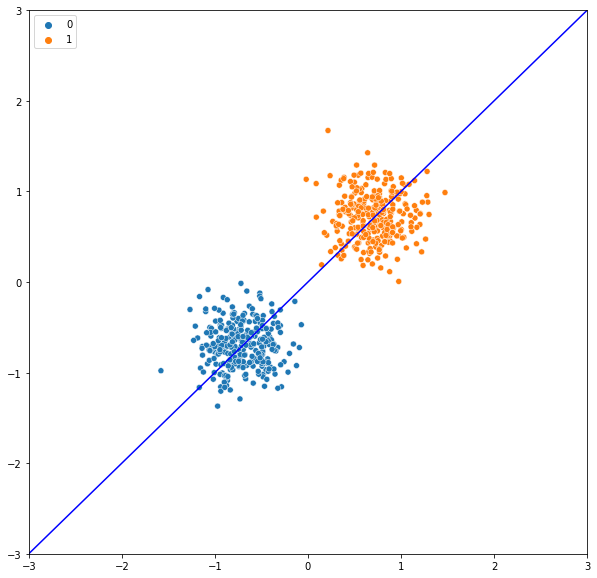

In [9]:
sns.set_palette("Reds")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=sns.color_palette('tab10', n_colors=2))

p, args = get_curve_points(cdml.M[0])
plt.plot(p[:, 0], p[:, 1], color='blue')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

# Moons

In [ ]:
X, y = make_moons(n_samples=10_000, shuffle=True, noise=0.05)
theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
X = X @ R

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, stratify=y)


params = {
    'curves_count': 2,
    'input_dim': 2,
    'poly_degree': 10,
    'loss_function': ContrastiveLoss(),
    'regularization': L2Regularization(),
    'reg_coef': 1.2,
    'learning_rate': 1e-2,
    'n_iter': 1000,
    'batch_size': 10,
    'silent': True,
}


cdml = CDML(**params)
cdml.init_euclidean()
cdml.fit(X_train, y_train)

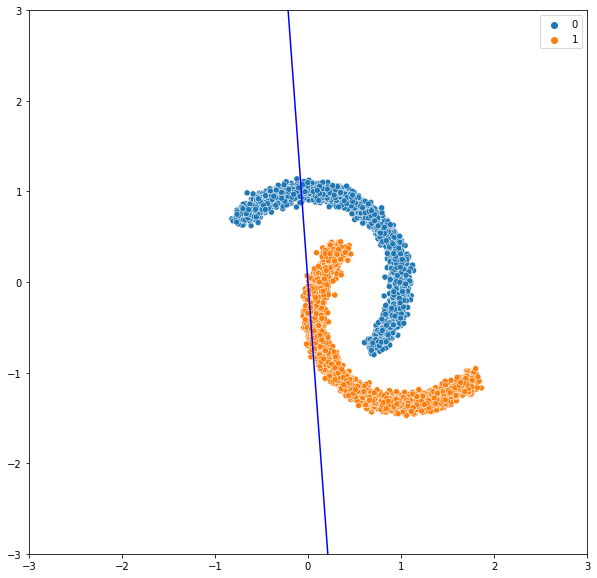

In [13]:
sns.set_palette("Reds")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=sns.color_palette('tab10', n_colors=2))

p, args = get_curve_points(cdml.M[0])
plt.plot(p[:, 0], p[:, 1], color='blue')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()